In [1]:
#Import Necessary Libraries 
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif as f
from matplotlib import pyplot as plt

2023-06-28 19:10:57.083881: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 19:10:57.523240: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 19:10:57.525306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 19:10:58.823201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#import dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


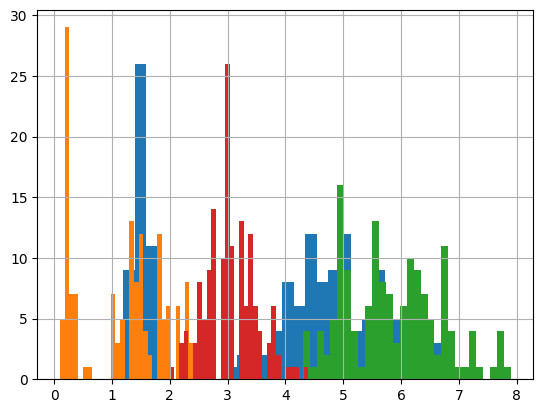

In [3]:
#visualize data
for feature in np.unique(df.columns):
    df[feature].hist(bins=30)

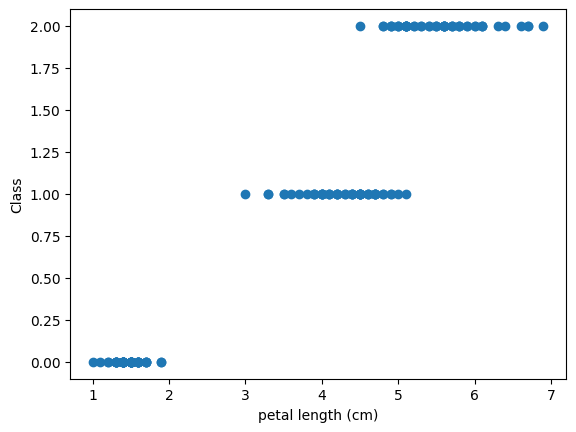

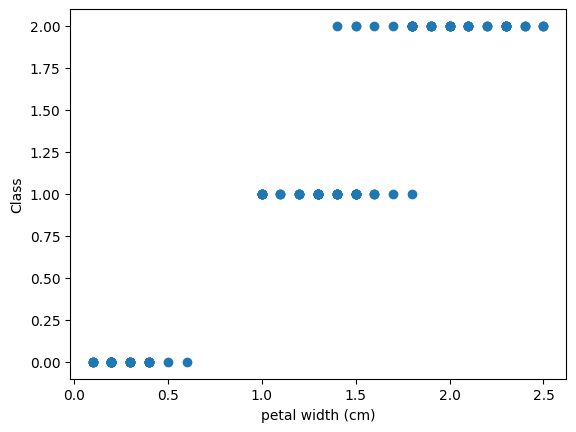

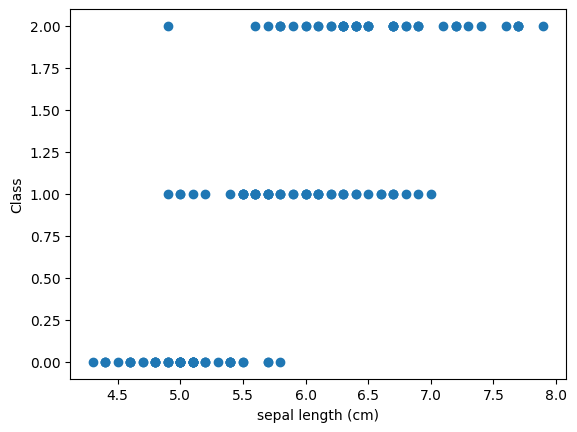

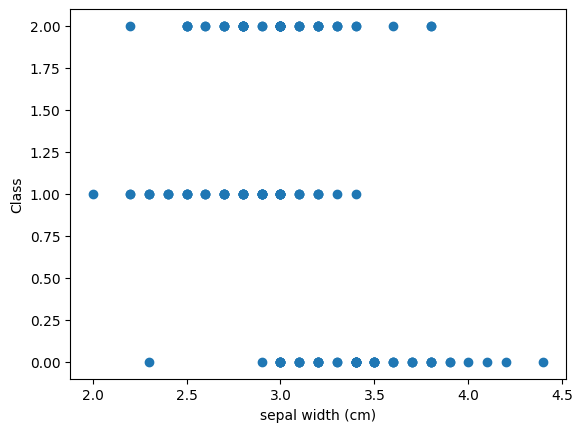

In [4]:
for feature in np.unique(df.columns):
    plt.scatter(df[feature], iris.target)
    plt.xlabel(feature)
    plt.ylabel("Class")
    plt.show()

In [5]:
#Run F test on features to determine the most important features
f_scores = print(list(zip(df.columns, f(df, iris.target)[1])))

[('sepal length (cm)', 1.6696691907731882e-31), ('sepal width (cm)', 4.4920171333119905e-17), ('petal length (cm)', 2.85677661096213e-91), ('petal width (cm)', 4.169445839445089e-85)]


In [6]:
#split data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(df, iris.target)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#fit and build nueral network model
opt = SGD(learning_rate=0.01, momentum=0.9)
model = Sequential()

n_features = len(df.columns)
model.add(Dense(8, activation = 'relu', input_shape=(n_features,)))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

          
model.fit(x_train, y_train, epochs=100, batch_size=25, verbose=0)

(112, 4) (38, 4) (112,) (38,)


In [7]:
#test model accuracy
loss, acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Accuracy:{acc}")

Accuracy:1.0


In [57]:
#accuracy score
y_pred = model.predict(x_test)

y_pred_list = [np.argmax(y_pred[x]) for x in range(len(y_pred))]

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_list)} \n")

#confusion matrix
print(f"confusion matrix: {confusion_matrix(y_test, y_pred_list)} \n")


probs = [y_pred[x][y_pred_list[x]] for x in range(len(y_pred_list))]

y_test = np.argmax(testdata, axis=0)

#roc
print(roc_auc_score(y_test, y_pred_list, multi_class="ovr"))

2/2 [==============================] - 0s 2ms/step
Accuracy Score: 1.0 

confusion matrix: [[17  0  0]
 [ 0 14  0]
 [ 0  0  7]] 

[0.996123, 0.9961242, 0.98621076, 0.9993537, 0.9950092, 0.6106837, 0.99877477, 0.5882354, 0.997726, 0.99658865, 0.9973501, 0.997141, 0.999343, 0.9976858, 0.991772, 0.9966875, 0.99848545, 0.8707994, 0.5616407, 0.9983772, 0.99796116, 0.9979136, 0.9981883, 0.9958579, 0.9892242, 0.9650325, 0.97201383, 0.7094842, 0.9958132, 0.99801564, 0.9912362, 0.9965588, 0.9979753, 0.99791723, 0.99224263, 0.998231, 0.972629, 0.96957785]
[0 0 1 1 1 2 0 2 0 0 1 0 0 1 2 0 0 2 1 0 0 1 0 0 1 1 1 2 0 1 1 0 2 0 1 0 1
 2]


AxisError: axis 1 is out of bounds for array of dimension 1